### ML Model Evaluation Non-Nested and Nested CV with GridSearchCV and RandomizedSearchCV With StratifiedKFold

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [10]:
# Construct dataset
X_1, y_1 = make_gaussian_quantiles(n_samples= 100,
                                 n_features=2,
                                 n_classes=2,
                                 )

# transform the dataset
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X1, y1 = ros.fit_resample(X_1, y_1)



X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)

In [11]:
model1 = LogisticRegression(random_state=1)
model2 = SVC(kernel= "rbf")
model3 = DecisionTreeClassifier(random_state=1)
model4 = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
model5 = KNeighborsClassifier(n_neighbors=5)
model6  = RandomForestClassifier(random_state=1)                              


In [12]:

#Logistic regression 
opti_grid_para1 = {"C": [0.01, 0.1, 1, 10, 100],
                  "random_state": [1]}
#SVM
opti_grid_para2 = {"C": [0.01, 0.1, 1, 10, 100],
                  "gamma": [0.01, 0.1, 1, 10, 100]}
#Decision-tree 
opti_grid_para3 = {'max_leaf_nodes': list(range(2, 50)), 
                  'min_samples_split': [2, 3, 4]}
#Gradient Boosting
opti_grid_para4 = dict(
    n_estimators=[100, 500],
    max_depth=[1, 2, 3]
)
#K-Nearest Neighbors
opti_grid_para5 = [{'n_neighbors': list(range(1, 10)),
                     'p': [1, 2]}]
# Random Forest
opti_grid_para6 = [{'n_estimators': [10, 100, 500]}]

In [13]:
num_of_trials = 10
X1_data = X1
y1_target = y1

In [14]:
nested_scores_m1 = np.zeros(num_of_trials)
nested_scores_m2 = np.zeros(num_of_trials)
nested_scores_m3 = np.zeros(num_of_trials)
nested_scores_m4 = np.zeros(num_of_trials)
nested_scores_m5 = np.zeros(num_of_trials)
nested_scores_m6 = np.zeros(num_of_trials)
non_nested_scores_m1 = np.zeros(num_of_trials)
non_nested_scores_m2 = np.zeros(num_of_trials)
non_nested_scores_m3 = np.zeros(num_of_trials)
non_nested_scores_m4 = np.zeros(num_of_trials)
non_nested_scores_m5 = np.zeros(num_of_trials)
non_nested_scores_m6 = np.zeros(num_of_trials)

In [15]:
for i in range(num_of_trials):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf_m1 = GridSearchCV(estimator=model1, param_grid=opti_grid_para1, cv=outer_cv)
    clf_m2 = GridSearchCV(estimator=model2, param_grid=opti_grid_para2, cv=outer_cv)
    clf_m3 = GridSearchCV(estimator=model3, param_grid=opti_grid_para3, cv=outer_cv)
    clf_m4 = GridSearchCV(estimator=model4, param_grid=opti_grid_para4, cv=outer_cv)
    clf_m5 = GridSearchCV(estimator=model5, param_grid=opti_grid_para5, cv=outer_cv)
    clf_m6 = GridSearchCV(estimator=model6, param_grid=opti_grid_para6, cv=outer_cv)
    #clf.fit(X1_data, y1_target)
    clf_m1.fit(X1_data, y1_target)
    clf_m2.fit(X1_data, y1_target)
    clf_m3.fit(X1_data, y1_target)
    clf_m4.fit(X1_data, y1_target)
    clf_m5.fit(X1_data, y1_target)
    clf_m6.fit(X1_data, y1_target)

    non_nested_scores_m1[i] = clf_m1.best_score_
    non_nested_scores_m2[i] = clf_m2.best_score_
    non_nested_scores_m3[i] = clf_m3.best_score_
    non_nested_scores_m4[i] = clf_m4.best_score_
    non_nested_scores_m5[i] = clf_m5.best_score_
    non_nested_scores_m6[i] = clf_m6.best_score_

    # Nested CV with parameter optimization
    clf_m1 = GridSearchCV(estimator=model1, param_grid=opti_grid_para1, cv=inner_cv)
    clf_m2 = GridSearchCV(estimator=model2, param_grid=opti_grid_para2, cv=inner_cv)
    clf_m3 = GridSearchCV(estimator=model3, param_grid=opti_grid_para3, cv=inner_cv)
    clf_m4 = GridSearchCV(estimator=model4, param_grid=opti_grid_para4, cv=inner_cv)
    clf_m5 = GridSearchCV(estimator=model5, param_grid=opti_grid_para5, cv=inner_cv)
    clf_m6 = GridSearchCV(estimator=model6, param_grid=opti_grid_para6, cv=inner_cv)
    #clf = GridSearchCV(estimator=model6, param_grid=opti_grid_para6, cv=inner_cv)
    #nested_score_1 = cross_val_score(clf, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_m1 = cross_val_score(clf_m1, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_m2 = cross_val_score(clf_m2, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_m3 = cross_val_score(clf_m3, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_m4 = cross_val_score(clf_m4, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_m5 = cross_val_score(clf_m5, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_m6 = cross_val_score(clf_m6, X=X1_data, y=y1_target, cv=outer_cv)
    #nested_scores_1[i] = nested_score_1.mean()
    nested_scores_m1[i] = nested_scores_m1.mean()
    nested_scores_m2[i] = nested_scores_m2.mean()
    nested_scores_m3[i] = nested_scores_m3.mean()
    nested_scores_m4[i] = nested_scores_m4.mean()
    nested_scores_m5[i] = nested_scores_m5.mean()
    nested_scores_m6[i] = nested_scores_m6.mean()

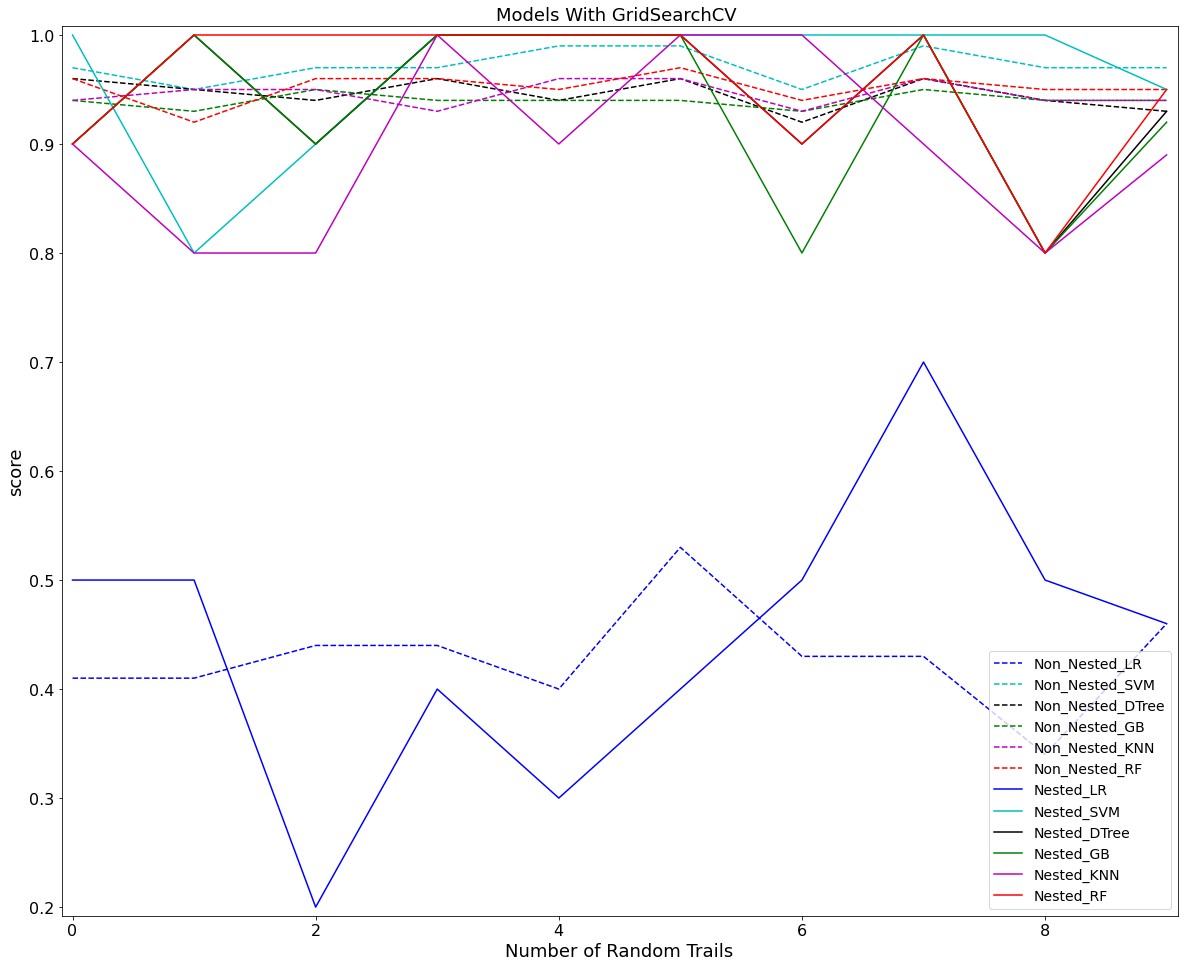

In [16]:
plt.figure(figsize=(20, 36))

ax = plt.subplot(211)
ax.margins(0.01)
plt.title('Models With GridSearchCV ', fontsize="18")
(non_nested_scores_line_m1,) = ax.plot(non_nested_scores_m1, color="b", linestyle="--", label="Non_Nested_LR")
(non_nested_scores_line_m2,) = ax.plot(non_nested_scores_m2, color="c", linestyle="--", label="Non_Nested_SVM")
(non_nested_scores_line_m3,) = ax.plot(non_nested_scores_m3, color="k", linestyle="--", label="Non_Nested_DTree")
(non_nested_scores_line_m4,) = ax.plot(non_nested_scores_m4, color="g", linestyle="--", label="Non_Nested_GB")
(non_nested_scores_line_m5,) = ax.plot(non_nested_scores_m5, color="m", linestyle="--", label="Non_Nested_KNN")
(non_nested_scores_line_m6,) = ax.plot(non_nested_scores_m6, color="r", linestyle="--", label="Non_Nested_RF")
(nested_line_m1,) = ax.plot(nested_scores_m1, color="b", label="Nested_LR")
(nested_line_m2,) = ax.plot(nested_scores_m2, color="c", label="Nested_SVM" )
(nested_line_m3,) = ax.plot(nested_scores_m3, color="k", label="Nested_DTree" )
(nested_line_m4,) = ax.plot(nested_scores_m4, color="g", label="Nested_GB" )
(nested_line_m5,) = ax.plot(nested_scores_m5, color="m", label="Nested_KNN" )
(nested_line_m6,) = ax.plot(nested_scores_m6, color="r", label="Nested_RF" )
plt.ylabel("score", fontsize="18")
plt.xlabel("Number of Random Trails", fontsize="18")
plt.xticks(fontsize = "16")
plt.yticks(fontsize = "16")
ax.legend(fontsize= "14")

In [17]:
for i in range(num_of_trials):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf_m1 = RandomizedSearchCV(estimator=model1, param_distributions=opti_grid_para1, cv=outer_cv)
    clf_m2 = RandomizedSearchCV(estimator=model2, param_distributions=opti_grid_para2, cv=outer_cv)
    clf_m3 = RandomizedSearchCV(estimator=model3, param_distributions=opti_grid_para3, cv=outer_cv)
    clf_m4 = RandomizedSearchCV(estimator=model4, param_distributions=opti_grid_para4, cv=outer_cv)
    clf_m5 = RandomizedSearchCV(estimator=model5, param_distributions=opti_grid_para5, cv=outer_cv)
    clf_m6 = RandomizedSearchCV(estimator=model6, param_distributions=opti_grid_para6, cv=outer_cv)
    #clf.fit(X1_data, y1_target)
    clf_m1.fit(X1_data, y1_target)
    clf_m2.fit(X1_data, y1_target)
    clf_m3.fit(X1_data, y1_target)
    clf_m4.fit(X1_data, y1_target)
    clf_m5.fit(X1_data, y1_target)
    clf_m6.fit(X1_data, y1_target)

    non_nested_scores_m1[i] = clf_m1.best_score_
    non_nested_scores_m2[i] = clf_m2.best_score_
    non_nested_scores_m3[i] = clf_m3.best_score_
    non_nested_scores_m4[i] = clf_m4.best_score_
    non_nested_scores_m5[i] = clf_m5.best_score_
    non_nested_scores_m6[i] = clf_m6.best_score_

    # Nested CV with parameter optimization
    clf_m1 = RandomizedSearchCV(estimator=model1, param_distributions=opti_grid_para1, cv=inner_cv)
    clf_m2 = RandomizedSearchCV(estimator=model2, param_distributions=opti_grid_para2, cv=inner_cv)
    clf_m3 = RandomizedSearchCV(estimator=model3, param_distributions=opti_grid_para3, cv=inner_cv)
    clf_m4 = RandomizedSearchCV(estimator=model4, param_distributions=opti_grid_para4, cv=inner_cv)
    clf_m5 = RandomizedSearchCV(estimator=model5, param_distributions=opti_grid_para5, cv=inner_cv)
    clf_m6 = RandomizedSearchCV(estimator=model6, param_distributions=opti_grid_para6, cv=inner_cv)
    #clf = GridSearchCV(estimator=model6, param_grid=opti_grid_para6, cv=inner_cv)
    #nested_score_1 = cross_val_score(clf, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_m1 = cross_val_score(clf_m1, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_m2 = cross_val_score(clf_m2, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_m3 = cross_val_score(clf_m3, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_m4 = cross_val_score(clf_m4, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_m5 = cross_val_score(clf_m5, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_m6 = cross_val_score(clf_m6, X=X1_data, y=y1_target, cv=outer_cv)
    #nested_scores_1[i] = nested_score_1.mean()
    nested_scores_m1[i] = nested_scores_m1.mean()
    nested_scores_m2[i] = nested_scores_m2.mean()
    nested_scores_m3[i] = nested_scores_m3.mean()
    nested_scores_m4[i] = nested_scores_m4.mean()
    nested_scores_m5[i] = nested_scores_m5.mean()
    nested_scores_m6[i] = nested_scores_m6.mean()

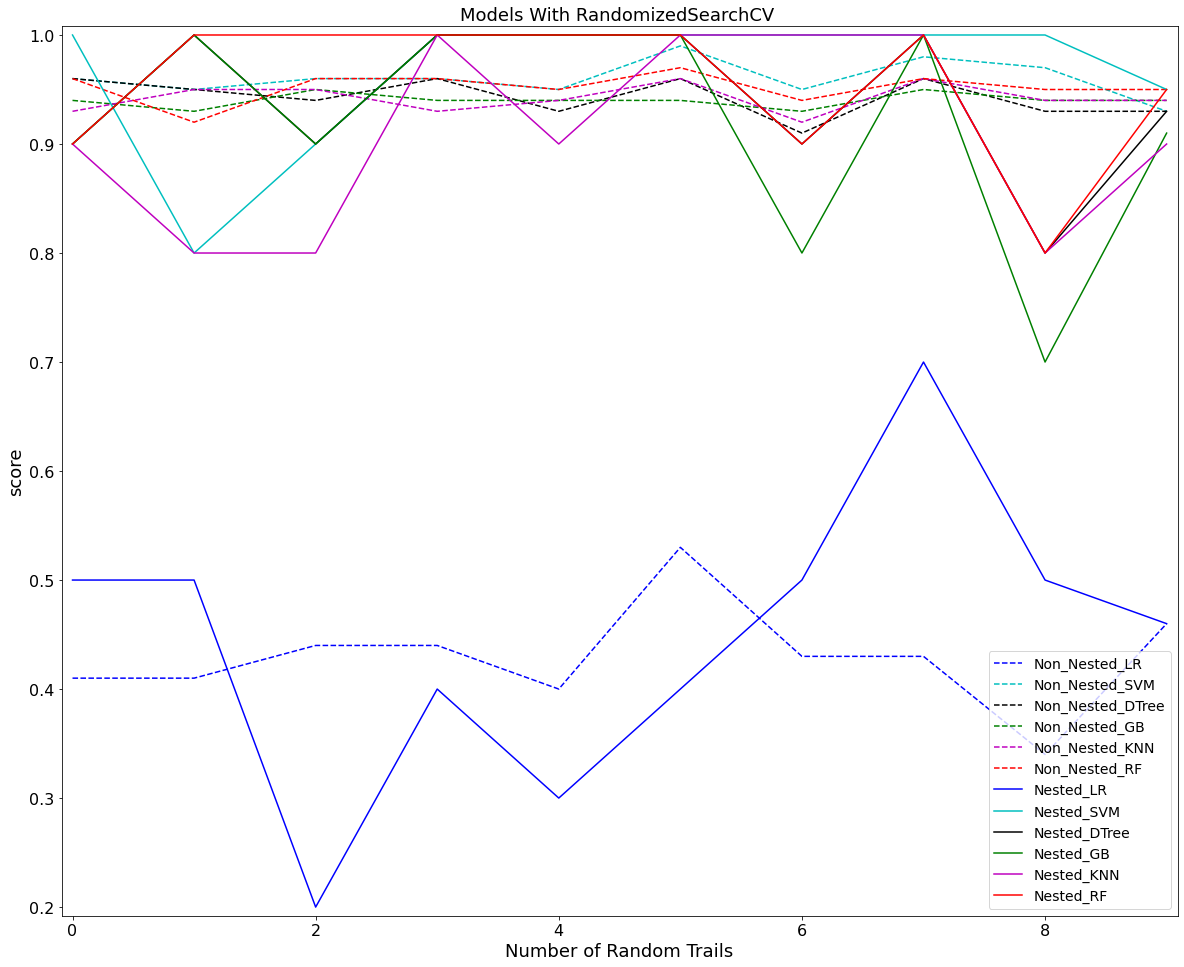

In [18]:
plt.figure(figsize=(20, 36))

ax = plt.subplot(211)
ax.margins(0.01)
plt.title('Models With RandomizedSearchCV ', fontsize="18")
(non_nested_scores_line_m1,) = ax.plot(non_nested_scores_m1, color="b", linestyle="--", label="Non_Nested_LR")
(non_nested_scores_line_m2,) = ax.plot(non_nested_scores_m2, color="c", linestyle="--", label="Non_Nested_SVM")
(non_nested_scores_line_m3,) = ax.plot(non_nested_scores_m3, color="k", linestyle="--", label="Non_Nested_DTree")
(non_nested_scores_line_m4,) = ax.plot(non_nested_scores_m4, color="g", linestyle="--", label="Non_Nested_GB")
(non_nested_scores_line_m5,) = ax.plot(non_nested_scores_m5, color="m", linestyle="--", label="Non_Nested_KNN")
(non_nested_scores_line_m6,) = ax.plot(non_nested_scores_m6, color="r", linestyle="--", label="Non_Nested_RF")
(nested_line_m1,) = ax.plot(nested_scores_m1, color="b", label="Nested_LR")
(nested_line_m2,) = ax.plot(nested_scores_m2, color="c", label="Nested_SVM" )
(nested_line_m3,) = ax.plot(nested_scores_m3, color="k", label="Nested_DTree" )
(nested_line_m4,) = ax.plot(nested_scores_m4, color="g", label="Nested_GB" )
(nested_line_m5,) = ax.plot(nested_scores_m5, color="m", label="Nested_KNN" )
(nested_line_m6,) = ax.plot(nested_scores_m6, color="r", label="Nested_RF" )
plt.ylabel("score", fontsize="18")
plt.xlabel("Number of Random Trails", fontsize="18")
plt.xticks(fontsize = "16")
plt.yticks(fontsize = "16")
ax.legend(fontsize= "14")